
# STOR 320: Introduction to Data Science
## Lab 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1. 

In this problem, you are given a pandas DataFrame that contains data about various features of a product line. The dataset includes the following columns:

- `Product ID`: A unique identifier for each product.
- `Category`: The category the product belongs to (e.g., `"Electronics", "Furniture", "Clothing"`).
- `Price`: The price of the product.
- `Rating`: Customer rating of the product (out of 5).
- `Sales`: Sales generated from selling the product.


In [3]:
np.random.seed(42)
data = {
    'Product ID': np.arange(1, 101),
    'Category': np.random.choice(['Electronics', 'Furniture', 'Clothing'], size=100),
    'Price': np.random.uniform(10, 100, size=100),
    'Rating': np.random.uniform(1, 5, size=100)
}

df = pd.DataFrame(data)
df["Sales"] = - 0.2 * df["Price"] + 50 + np.random.normal(0, 40, size=100)
df.head(5)

,Product ID,Category,Price,Rating,Sales
0,1,Clothing,27.884411,1.066351,56.601083
1,2,Electronics,10.496991,3.048372,58.188902
2,3,Clothing,83.391529,1.905983,34.278967
3,4,Clothing,73.617161,3.580691,70.153127
4,5,Electronics,75.610645,1.697466,92.372124


**1.1**. Create a series of histograms to show the distribution of `Price` for each category. In other words, each subplot shows the distribution of one category. Obtain these plots using two different methods `matplotlib` and `seaborn`, and compare the outputs from both methods.  

**1.2**. Create a plot that displays the total sales for each category as a bar plot using `matplotlib`. On the same plot, also show the average rating for each category. Use the `twinx` function to create a secondary y-axis for the average ratings.

**1.3**.  Create a scatter plot to visualize the relationship between `Price` and `Sales` using `matplotlib`. Fit a quick linear regression model etween `Price` and `Sales` by utilizing `seaborn`'s built-in regression method `sns.regplot`. Include its 90% confidence interval.

**1.4**. Recreate the plot in **1.3** by adding the category information. Hint: Use `lmplot` instead of `regplot`.

For each plot, add labels, a title, and legend. 

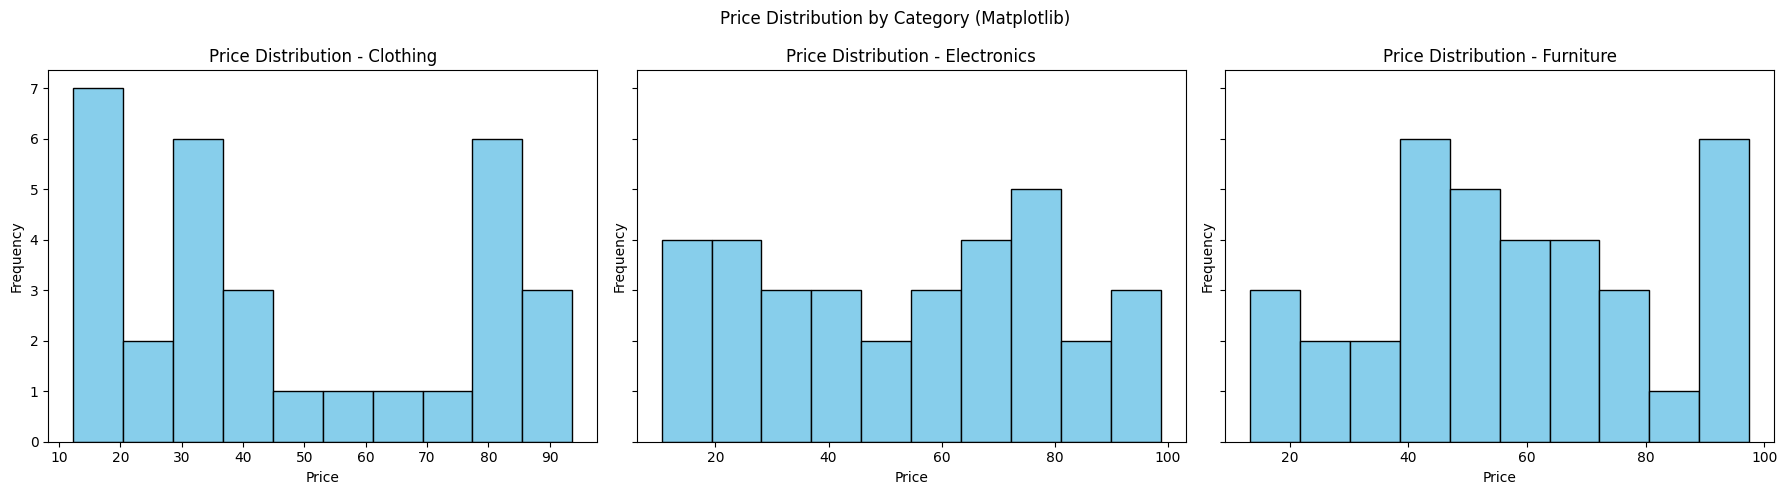

In [4]:
categories = df['Category'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, category in enumerate(categories):
    axes[i].hist(df[df['Category'] == category]['Price'], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Price Distribution - {category}")
    axes[i].set_xlabel("Price")
    axes[i].set_ylabel("Frequency")
plt.suptitle("Price Distribution by Category (Matplotlib)")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, category in enumerate(categories):
    sns.histplot(df[df['Category'] == category]['Price'], bins=10, ax=axes[i], kde=True)
    axes[i].set_title(f"Price Distribution - {category}")
    axes[i].set_xlabel("Price")
    axes[i].set_ylabel("Frequency")
plt.suptitle("Price Distribution by Category (Seaborn)")
plt.tight_layout()
plt.show()

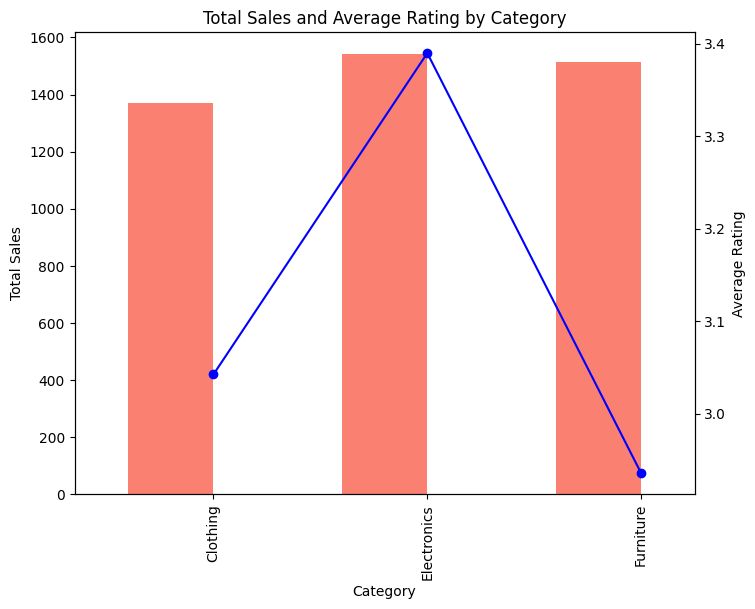

In [8]:
category_sales = df.groupby("Category")["Sales"].sum()
category_rating = df.groupby("Category")["Rating"].mean()

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

category_sales.plot(kind='bar', color='salmon', ax=ax1, width=0.4, position=1)
ax1.set_ylabel("Total Sales")
ax1.set_xlabel("Category")
ax1.set_title("Total Sales and Average Rating by Category")

category_rating.plot(kind='line', color='blue', marker='o', ax=ax2)
ax2.set_ylabel("Average Rating")
plt.show()


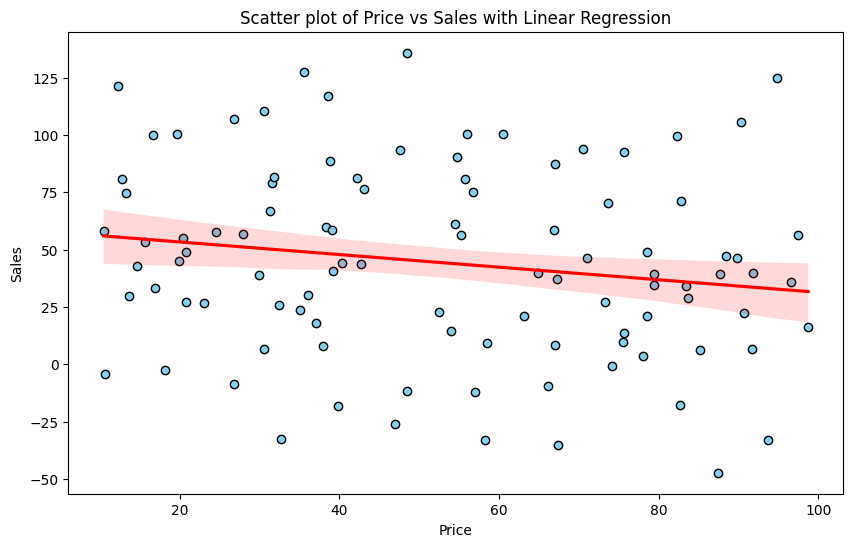

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Sales'], color='skyblue', edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Sales")
plt.title("Scatter plot of Price vs Sales with Linear Regression")
sns.regplot(data=df, x="Price", y="Sales", scatter=False, ci=90, line_kws={"color": "red"})
plt.show()

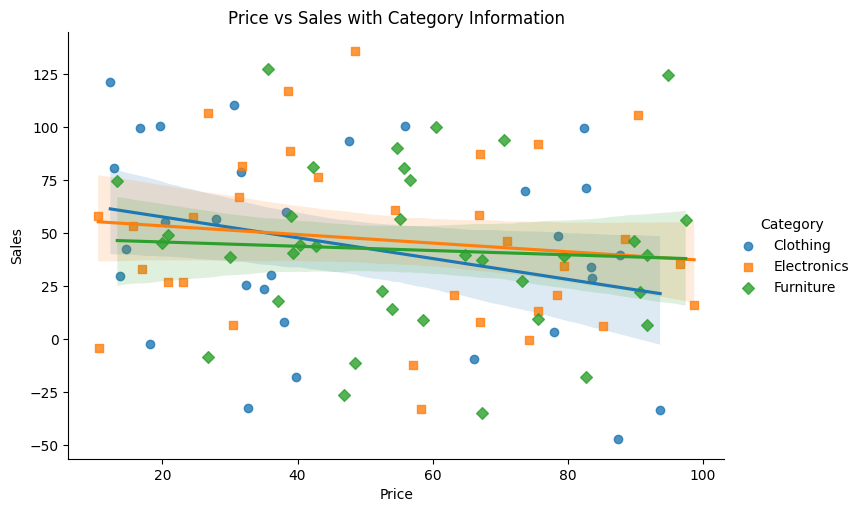

In [10]:
sns.lmplot(data=df, x="Price", y="Sales", hue="Category", aspect=1.5, ci=90, markers=["o", "s", "D"])
plt.xlabel("Price")
plt.ylabel("Sales")
plt.title("Price vs Sales with Category Information")
plt.show()